### Importing main libraries

In [101]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier

### Loading MNIST data 

In [3]:
data = mnist.load_data()

In [4]:
(trainX, trainy), (X_test, Y_test) = data

### Data split into Train, Valdiation and Test sets, and flattining of feature vectors

In [5]:
X_train = trainX[:55000,:,:]
X_validation = trainX[55000:,:,:]
Y_train = trainy[:55000]
Y_validation = trainy[55000:]

In [6]:
X_train_flt = X_train.reshape(X_train.shape[0],X_train[0,:,:].size)
X_validation_flt = X_validation.reshape(X_validation.shape[0], X_validation[0,:,:].size)
X_test_flt = X_test.reshape(X_test.shape[0], X_test[0,:,:].size)

In [119]:
X_train_flt.shape

(55000, 784)

In [299]:
X_validation_flt.shape

(5000, 784)

In [120]:
full_X_train=np.concatenate((X_train_flt,X_validation_flt))
full_Y_train=np.concatenate((Y_train,Y_validation))

In [118]:
full_X_train.shape

(60000, 784)

In [121]:
full_Y_train.shape

(60000,)

### (Not required for this) Encoding labels wiht OneHotEncoder

In [18]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
Y_train_encd = ohe.fit_transform(Y_train.reshape(-1,1)) 
Y_validation_encd = ohe.fit_transform(Y_validation.reshape(-1,1))
Y_test_encd = ohe.fit_transform(Y_test.reshape(-1,1)) 

## Training Decision Tree Classifier

In [33]:
clf_DT=tree.DecisionTreeClassifier(criterion='gini')

In [34]:
clf_DT = clf_DT.fit(X_train_flt,Y_train)

In [35]:
Y_valid_pred = clf_DT.predict(X_validation_flt)

### Performance check on Validation set
#### Performance with "gini" criterion with best split 

In [36]:
clf_DT=tree.DecisionTreeClassifier(criterion='gini')
clf_DT = clf_DT.fit(X_train_flt,Y_train)
Y_valid_pred = clf_DT.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.8892

#### Performance with "entropy" criterion wiht best split

In [37]:
clf_DT=tree.DecisionTreeClassifier(criterion='entropy')
clf_DT = clf_DT.fit(X_train_flt,Y_train)
Y_valid_pred = clf_DT.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.8982

#### Performance with "entropy" criterion with random split

In [40]:
clf_DT=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
clf_DT = clf_DT.fit(X_train_flt,Y_train)
Y_valid_pred = clf_DT.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9006

#### Performance with "entropy" criterion with random split with depth of 20

In [42]:
clf_DT=tree.DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=20)
clf_DT = clf_DT.fit(X_train_flt,Y_train)
Y_valid_pred = clf_DT.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.8944

### Performance check on Test set with the best performance hyperparameters 

In [44]:
clf_DT=tree.DecisionTreeClassifier(criterion="entropy", splitter='random')
clf_DT = clf_DT.fit(X_train_flt,Y_train)
Y_test_pred = clf_DT.predict(X_test_flt)
metrics.accuracy_score(Y_test,Y_test_pred)

0.8762

## Training K-Nearest Neighbors Classifier

### Performance check on Validation set

#### With 1-Nearest Neighbors

In [45]:
clf_KNN=KNeighborsClassifier(n_neighbors=1)
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.977

#### With 3-Nearest Neighbors

In [46]:
clf_KNN=KNeighborsClassifier(n_neighbors=3)
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9782

#### With 5-Nearest Neighbors

In [47]:
clf_KNN=KNeighborsClassifier(n_neighbors=5)
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9776

#### With 15-Nearest Neighbors

In [48]:
clf_KNN=KNeighborsClassifier(n_neighbors=15)
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9754

#### With 5-Nearest Neighbors, 'distance' type weight function and  p=1 power parameter for Minkowski metric(Manhattan distance)

In [49]:
clf_KNN=KNeighborsClassifier(n_neighbors=5, weights='distance',p=1)
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9748

#### With 5-Nearest Neighbors and  p=1 power parameter for Minkowski metric(Manhattan distance)

In [50]:
clf_KNN=KNeighborsClassifier(n_neighbors=5,p=1)
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.974

#### With 5-Nearest Neighbors and 'distance' type weight function

In [51]:
clf_KNN=KNeighborsClassifier(n_neighbors=5, weights='distance')
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9782

#### With 3-Nearest Neighbors and 'distance' type weight function

In [52]:
clf_KNN=KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_KNN = clf_KNN.fit(X_train_flt,Y_train)
Y_valid_pred = clf_KNN.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9786

### Performance check on Test set with the best performance hyperparameters 

In [54]:
clf_KNN = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_KNN = clf_KNN.fit(X_train_flt,Y_train_encd)
Y_test_pred = clf_KNN.predict(X_test_flt)
metrics.accuracy_score(Y_test_encd,Y_test_pred)

0.9685

## Training Gaussian Niave Bayes Classifier

### Performance check on Validation set

#### With var_smooth = 1e-9 (default) 

In [70]:
clf_GNB=GaussianNB()
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_valid_pred = clf_GNB.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.567

#### With var_smooth = 1e-7

In [73]:
clf_GNB=GaussianNB(var_smoothing=1e-7)
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_valid_pred = clf_GNB.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.602

#### With var_smooth = 1e-5

In [75]:
clf_GNB=GaussianNB(var_smoothing=1e-5)
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_valid_pred = clf_GNB.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.6544

#### With var_smooth = 1e-3

In [77]:
clf_GNB=GaussianNB(var_smoothing=1e-3)
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_valid_pred = clf_GNB.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.7636

#### With var_smooth = 1e-2

In [78]:
clf_GNB=GaussianNB(var_smoothing=1e-2)
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_valid_pred = clf_GNB.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.8142

#### With var_smooth = 1e-1

In [79]:
clf_GNB=GaussianNB(var_smoothing=1e-1)
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_valid_pred = clf_GNB.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.8374

### Performance check on Test set with the best performance hyperparameters 

In [84]:
clf_GNB=GaussianNB(var_smoothing=1e-1)
clf_GNB = clf_GNB.fit(X_train_flt,Y_train)
Y_test_pred = clf_GNB.predict(X_test_flt)
metrics.accuracy_score(Y_test,Y_test_pred)

0.8153

## Training Support Vector Machine (SVC and LinearSVC) Classifier

### Performance check on Validation set

#### SVC With default parameters

In [94]:
clf_SVM=SVC()
clf_SVM = clf_SVM.fit(X_train_flt,Y_train)
Y_valid_pred = clf_SVM.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9844

#### SVC With polynomial kernel

In [96]:
clf_SVM=SVC(kernel='poly')
clf_SVM = clf_SVM.fit(X_train_flt,Y_train)
Y_valid_pred = clf_SVM.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9834

#### LinearSVC with default parameters

In [99]:
clf_SVM2=LinearSVC()
clf_SVM2 = clf_SVM2.fit(X_train_flt,Y_train)
Y_valid_pred = clf_SVM.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

C:\Users\arsha\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9844

In [100]:
clf_SVM2=LinearSVC(dual=False)
clf_SVM2 = clf_SVM2.fit(X_train_flt,Y_train)
Y_valid_pred = clf_SVM.predict(X_validation_flt)
metrics.accuracy_score(Y_validation,Y_valid_pred)

0.9844

### Performance check on Test set with the default hyperparameters 

In [97]:
clf_SVM=SVC()
clf_SVM = clf_SVM.fit(X_train_flt,Y_train)
Y_test_pred = clf_SVM.predict(X_test_flt)
metrics.accuracy_score(Y_test,Y_test_pred)

0.9786

## Ensemble Classifier

#### Defining classifiers with their best hyperparameters to be used in Ensemble

In [103]:
clf_DT=tree.DecisionTreeClassifier(criterion="entropy", splitter='random')
clf_KNN = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_GNB=GaussianNB(var_smoothing=1e-1)
clf_SVM=SVC()

#### Building Ensemble Classifier with "Hard" voting

In [104]:
hard_voting_clf = VotingClassifier(
    estimators=[
        ('dt', clf_DT),
        ('knn', clf_KNN),
        ('gnb', clf_GNB),
        ('svm', clf_SVM)],
    voting='hard'    
)

In [105]:
hard_voting_clf.fit(X_train_flt, Y_train)
Y_test_pred = hard_voting_clf.predict(X_test_flt)
metrics.accuracy_score(Y_test,Y_test_pred)

0.9674

#### Building Ensemble Classifier with "Soft" voting

In [112]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('dt', clf_DT),
        ('knn', clf_KNN),
        ('gnb', clf_GNB),
        ('svm', clf_SVM)],
    voting='soft'    
)

In [113]:
soft_voting_clf.named_estimators['svm'].probability=True

In [114]:
soft_voting_clf.fit(X_train_flt, Y_train)
Y_test_pred_soft = soft_voting_clf.predict(X_test_flt)
metrics.accuracy_score(Y_test,Y_test_pred_soft)

0.9638

### Building Ensemble classifier with "Hard" voting to train on full trianing set (train and validation combined) 

In [122]:
hard_voting_clf_2 = VotingClassifier(
    estimators=[
        ('dt', clf_DT),
        ('knn', clf_KNN),
        ('gnb', clf_GNB),
        ('svm', clf_SVM)],
    voting='hard'    
)

In [123]:
hard_voting_clf_2.fit(full_X_train, full_Y_train)
Y_test_pred_full = hard_voting_clf_2.predict(X_test_flt)
metrics.accuracy_score(Y_test,Y_test_pred_full)

0.9689

### Extra: Evaluation of wrongly predicted datapoints 

In [124]:
wrong_Pred_List=[]

for i in range(10000):
    if Y_test_pred_full[i]!=Y_test[i]:
        wrong_Pred_List.append(i)

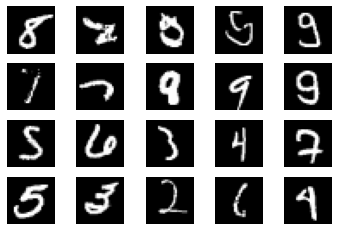

[[5 7 0 0 3]
 [1 4 9 4 8]
 [3 0 1 9 2]
 [0 2 1 1 9]]


[5138,
 4176,
 3558,
 3893,
 3597,
 6576,
 2695,
 947,
 9808,
 241,
 2559,
 3801,
 2533,
 65,
 4690,
 6728,
 5140,
 1138,
 4699,
 740]

In [130]:
n_images = X_test.shape[0]
n_rows=4
n_cols=5
pred_numbers=[]
img_id = []
for i in range(1,n_rows*n_cols+1):
    idx = random.randint(0,len(wrong_Pred_List)-1)
    im_idx =wrong_Pred_List[idx]
    img_id.append(im_idx)
    pixels=X_test[im_idx]
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(pixels, cmap='gray')
    plt.axis('off')
    pred_numbers.append(Y_test_pred_full[im_idx])
    
plt.show()
arr=np.array(pred_numbers)
arr.shape = (4,5)
print(arr)
img_id

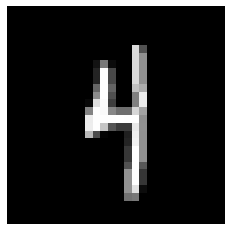

2


In [135]:
n_images = X_test.shape[0]

pixels = X_test[65]
plt.imshow(pixels, cmap='gray')
plt.axis('off')
plt.show()
print(Y_test_pred_full[1])